'''
The sinking of the RMS Titanic is one of the most infamous shipwrecks in history. 
One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the 
passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of 
people were more likely to survive than others, such as women, children, and the upper-class.
Apply the tools of machine learning to predict which passengers survived the tragedy.
'''

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train = pd.read_csv('titanic_train-Copy1.csv')

In [4]:
train.head(10)
# Survived - 0- no, 1 -yes
# Pclass - Passenger class (Relative indication of their status)
# SibSp - Number of siblings/spouses aboard
# Parch - Number of Parents/children aboard
# Embarked - port of embarkabation (destination)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
# Handling Missing data

In [6]:
# train.isnull() # cabin column has maximum nan's

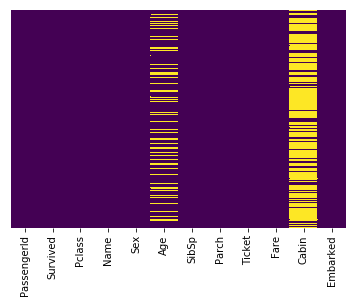

In [9]:
sns.heatmap(train.isnull(),yticklabels=False, cbar=False,cmap='viridis')
# All the yellow lines indiacte the data being null

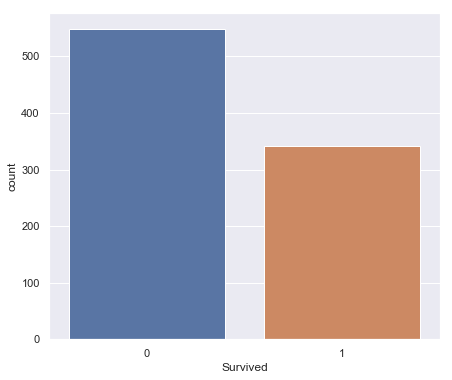

In [9]:
sns.set_style('whitegrid')
sns.set(rc={'figure.figsize':(7,6)})
sns.countplot(x = 'Survived',data=train)
# More people died 

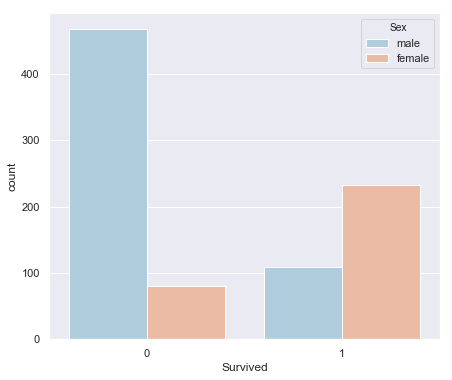

In [10]:
sns.countplot(x = 'Survived',data = train,hue = 'Sex',palette='RdBu_r')
#  Females had a greater chance of survivng the wreck

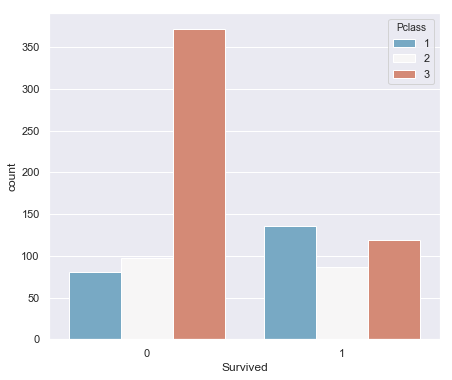

In [11]:
sns.countplot(x = 'Survived',data = train,hue = 'Pclass',palette='RdBu_r')
# Evidently, passengers with first-class tickets are more likely to survive than their 2nd and 3rd class counterparts

In [12]:
# sns.countplot(x = 'Survived',data=train,hue = 'Age') --> too verbose 

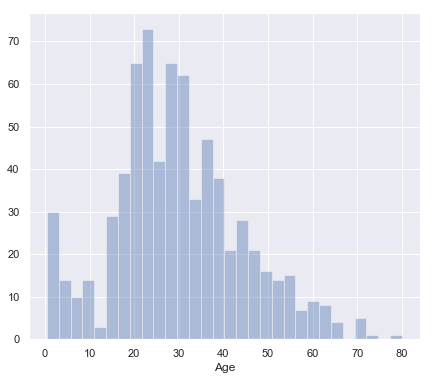

In [13]:
sns.set()
sns.distplot(train['Age'].dropna(),kde = False ,bins = 30)
# shows that number of young people on the cruise were more than older people(avg in 20-30)

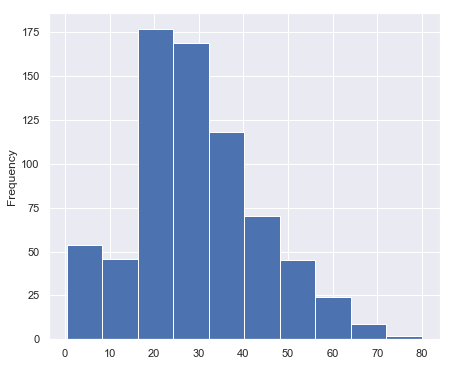

In [14]:
train['Age'].plot.hist() # pandas built in visualization library

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


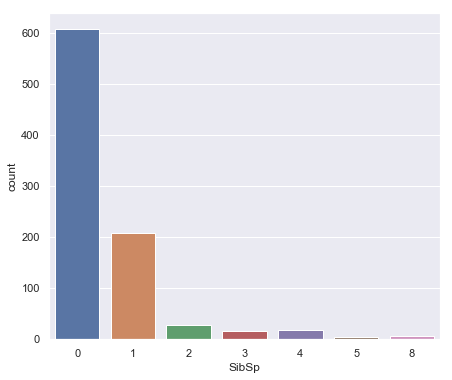

In [16]:
sns.countplot(x = 'SibSp',data = train)
# Most of the passengers aboard were on their own (did not have spouse/sibling)

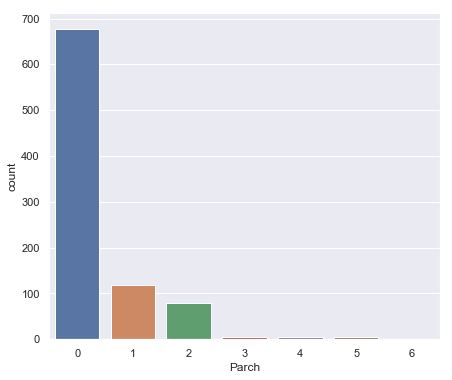

In [17]:
sns.countplot(x = 'Parch',data = train)
# same analysis as sibsp

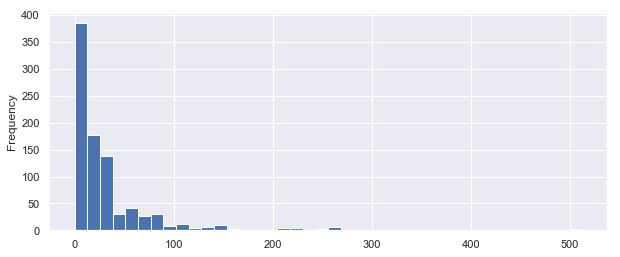

In [18]:
train['Fare'].plot.hist(bins = 40,figsize =(10,4))
# most of the tickets were under 100$! which is ovious since a large number of people in the ship had 3rd class tickets 

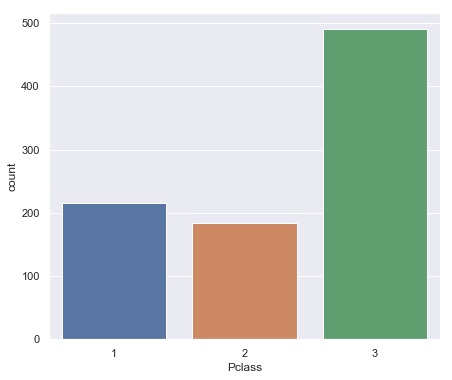

In [19]:
sns.countplot(x='Pclass',data=train)

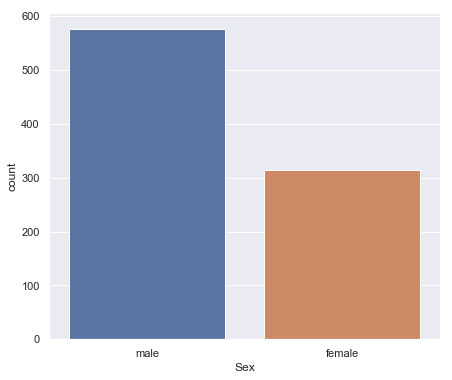

In [20]:
sns.countplot(x='Sex',data=train)

In [21]:
# Handling missing data
# First to handle missing ages, we can simply enter the mean of available ages.However this can be done more aptly by
# entering mean ages of their particular pclass.

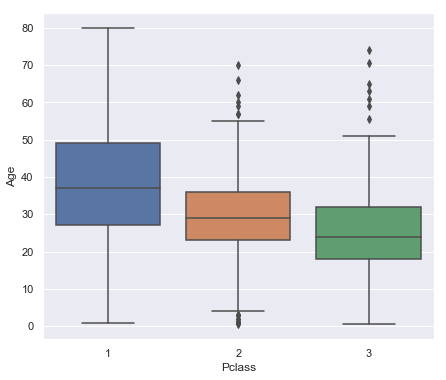

In [22]:
sns.boxplot(x='Pclass',y='Age',data=train)

In [23]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [24]:
train.groupby('Pclass').mean()

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


In [25]:
def impute_age(cols): # cols implies sending two columns age and pclass
    age = cols[0]
    Pclass = cols[1]
    #print(cols)
    if pd.isnull(age):
        
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 29
        else:
            return 25
    else:
        return age

In [26]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis = 1)# applying impute_age sends the 2 columns age and Pclass in cols

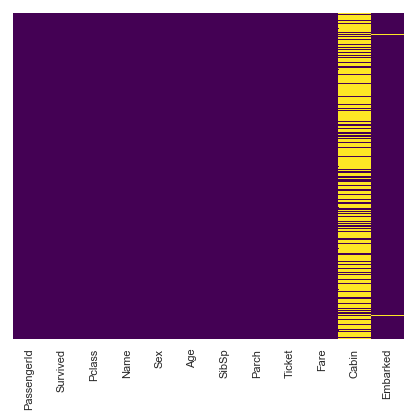

In [27]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis') # age column's missing data has been filled

In [28]:
# handling misssing cabin data;- too much data is missing to do anything useful from it. hence drop it

In [29]:
train.drop('Cabin',axis = 1, inplace=True)
# train.dropna(inplace=True) # drop other missing null values

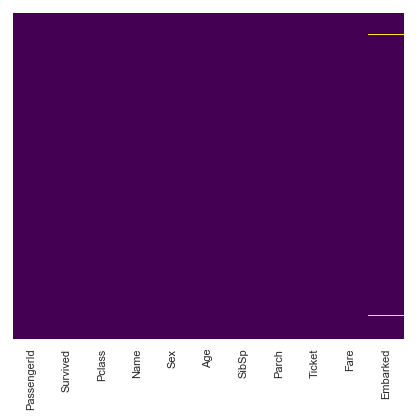

In [30]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [31]:
train.dropna(inplace=True) # drop other missing null values

In [32]:
# Converting our categorical data into numerical data since machine learning algos can't make any sense of text data

In [33]:
pd.get_dummies(train['Sex'],drop_first=True).head()

,male
0,1
1,0
2,0
3,0
4,1


In [34]:
pd.get_dummies(train['Embarked'],drop_first=True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [35]:
sex = pd.get_dummies(train['Sex'],drop_first=True)

In [36]:
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [37]:
train = pd.concat([train,sex,embark],axis = 1)

In [38]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [39]:
# drop other text columns that won't contribute to feature set like name ticket etc

In [40]:
train.drop(['Sex','Embarked','Ticket','Name'],axis = 1,inplace=True)

In [41]:
train.drop('PassengerId',axis = 1,inplace=True)

In [42]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [43]:
train.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q',
       'S'],
      dtype='object')

In [44]:
X = train.drop('Survived',axis=1)
y = train['Survived']

In [45]:
from sklearn.cross_validation import train_test_split

c:\users\kushal\appdata\local\programs\python\python36\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [46]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.4, random_state = 101)

In [47]:
from sklearn.linear_model import LogisticRegression

In [48]:
model = LogisticRegression()

In [49]:
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [50]:
predictions = model.predict(X_test)

In [51]:
from sklearn.metrics import classification_report

In [52]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.79      0.87      0.83       216
          1       0.76      0.65      0.70       140

avg / total       0.78      0.78      0.78       356



In [53]:
model.coef_
coef = np.array(model.coef_[0])
coef

array([-0.72407455, -0.02380146, -0.22937732, -0.1068235 ,  0.00605678,
       -2.44531166,  0.10580243, -0.07183823])

In [54]:
#model.coef_ 
# learnt parameters
cdf = pd.DataFrame(coef, X.columns, columns = ['Coef'])
cdf 

,Coef
Pclass,-0.724075
Age,-0.023801
SibSp,-0.229377
Parch,-0.106824
Fare,0.006057
male,-2.445312
Q,0.105802
S,-0.071838


In [55]:
%store

Stored variables and their in-db values:


In [56]:
#----XXXX-----#